# Chicago Crime Rate Analysis & Forecasting

This project analyzes historical crime data from Chicago (2005–2017)
to identify long-term trends and prepare the data for time-series forecasting.

The dataset is large and contains real-world data quality issues,
which are handled carefully throughout the analysis.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import zipfile

# Display settings
pd.set_option('display.max_columns', None)


## Why Google Drive is Used

The Chicago crime dataset is very large and cannot be handled efficiently
on a local machine with limited memory.

Google Drive is used to:
- Store large CSV files safely
- Access them directly in Google Colab
- Avoid local system memory limitations


In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


## Dataset Description

The dataset is split into multiple time ranges:
- 2005 to 2007
- 2008 to 2011
- 2012 to 2017

Each file contains crime records reported by the Chicago Police Department.


In [3]:
!ls /content/drive/MyDrive/Chicago_Crime_Project


Chicago_Crimes_2005_to_2007.csv      Chicago_Crimes_2008_to_2011.csv.zip
Chicago_Crimes_2005_to_2007.csv.zip  Chicago_Crimes_2012_to_2017.csv
Chicago_Crimes_2008_to_2011.csv      Chicago_Crimes_2012_to_2017.csv.zip


In [4]:
folder = '/content/drive/MyDrive/Chicago_Crime_Project'

for file in os.listdir(folder):
    if file.endswith('.zip'):
        with zipfile.ZipFile(os.path.join(folder, file), 'r') as zip_ref:
            zip_ref.extractall(folder)

# Verify extracted files
!ls /content/drive/MyDrive/Chicago_Crime_Project


Chicago_Crimes_2005_to_2007.csv      Chicago_Crimes_2008_to_2011.csv.zip
Chicago_Crimes_2005_to_2007.csv.zip  Chicago_Crimes_2012_to_2017.csv
Chicago_Crimes_2008_to_2011.csv      Chicago_Crimes_2012_to_2017.csv.zip


## Data Loading Strategy

The CSV files contain some malformed rows with:
- Extra commas
- Broken quotes
- Inconsistent columns

To handle this real-world data issue:
- Python parsing engine is used
- Bad rows are skipped safely
- Majority of clean data is preserved


In [5]:
# Define file paths
path1 = '/content/drive/MyDrive/Chicago_Crime_Project/Chicago_Crimes_2005_to_2007.csv'
path2 = '/content/drive/MyDrive/Chicago_Crime_Project/Chicago_Crimes_2008_to_2011.csv'
path3 = '/content/drive/MyDrive/Chicago_Crime_Project/Chicago_Crimes_2012_to_2017.csv'

# Load CSVs safely
df_list = []

for path in [path1, path2, path3]:
    temp = pd.read_csv(
        path,
        engine='python',
        on_bad_lines='skip'
    )
    df_list.append(temp)

# Combine all datasets
df = pd.concat(df_list, ignore_index=True)

print("Dataset shape:", df.shape)
df.head()


Dataset shape: (6017767, 23)


,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,0,4673626,HM274058,04/02/2006 01:00:00 PM,055XX N MANGO AVE,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False,1622,16.0,45.0,11.0,26,1136872.0,1936499.0,2006,04/15/2016 08:55:02 AM,41.981913,-87.771996,"(41.981912692, -87.771996382)"
1,1,4673627,HM202199,02/26/2006 01:40:48 PM,065XX S RHODES AVE,2017,NARCOTICS,MANU/DELIVER:CRACK,SIDEWALK,True,False,321,3.0,20.0,42.0,18,1181027.0,1861693.0,2006,04/15/2016 08:55:02 AM,41.775733,-87.611920,"(41.775732538, -87.611919814)"
2,2,4673628,HM113861,01/08/2006 11:16:00 PM,013XX E 69TH ST,051A,ASSAULT,AGGRAVATED: HANDGUN,OTHER,False,False,321,3.0,5.0,69.0,04A,1186023.0,1859609.0,2006,04/15/2016 08:55:02 AM,41.769897,-87.593671,"(41.769897392, -87.593670899)"
3,4,4673629,HM274049,04/05/2006 06:45:00 PM,061XX W NEWPORT AVE,0460,BATTERY,SIMPLE,RESIDENCE,False,False,1633,16.0,38.0,17.0,08B,1134772.0,1922299.0,2006,04/15/2016 08:55:02 AM,41.942984,-87.780057,"(41.942984005, -87.780056951)"
4,5,4673630,HM187120,02/17/2006 09:03:14 PM,037XX W 60TH ST,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,ALLEY,True,False,822,8.0,13.0,65.0,18,1152412.0,1864560.0,2006,04/15/2016 08:55:02 AM,41.784211,-87.716745,"(41.784210853, -87.71674491)"


## Initial Data Inspection

After merging all files:
- The dataset contains millions of records
- Column names and data types are checked
- Further cleaning is required before analysis


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6017767 entries, 0 to 6017766
Data columns (total 23 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Unnamed: 0            int64  
 1   ID                    int64  
 2   Case Number           object 
 3   Date                  object 
 4   Block                 object 
 5   IUCR                  object 
 6   Primary Type          object 
 7   Description           object 
 8   Location Description  object 
 9   Arrest                bool   
 10  Domestic              bool   
 11  Beat                  int64  
 12  District              float64
 13  Ward                  float64
 14  Community Area        float64
 15  FBI Code              object 
 16  X Coordinate          float64
 17  Y Coordinate          float64
 18  Year                  int64  
 19  Updated On            object 
 20  Latitude              float64
 21  Longitude             float64
 22  Location              object 
dtypes: bool

## Date Processing

The `Date` column is converted into datetime format.
This is required for:
- Time-series analysis
- Yearly and monthly trend analysis
- Forecasting models


In [7]:
# Convert Date column using known format (MM/DD/YYYY HH:MM:SS AM/PM)
df['Date'] = pd.to_datetime(
    df['Date'],
    format='%m/%d/%Y %I:%M:%S %p',
    errors='coerce'
)

# Remove rows with invalid dates
df = df.dropna(subset=['Date'])

df[['Date']].head()


,Date
0,2006-04-02 13:00:00
1,2006-02-26 13:40:48
2,2006-01-08 23:16:00
3,2006-04-05 18:45:00
4,2006-02-17 21:03:14


## Feature Selection

For trend analysis, only relevant columns are retained:
- Date
- Primary Type (crime category)
- Arrest
- Domestic


In [8]:
df = df[['Date', 'Primary Type', 'Arrest', 'Domestic']]
df.head()


,Date,Primary Type,Arrest,Domestic
0,2006-04-02 13:00:00,OTHER OFFENSE,False,False
1,2006-02-26 13:40:48,NARCOTICS,True,False
2,2006-01-08 23:16:00,ASSAULT,False,False
3,2006-04-05 18:45:00,BATTERY,False,False
4,2006-02-17 21:03:14,NARCOTICS,True,False


## Yearly Crime Trend Analysis

Crimes are aggregated per year to observe:
- Long-term crime trends
- Peaks and drops in crime rate


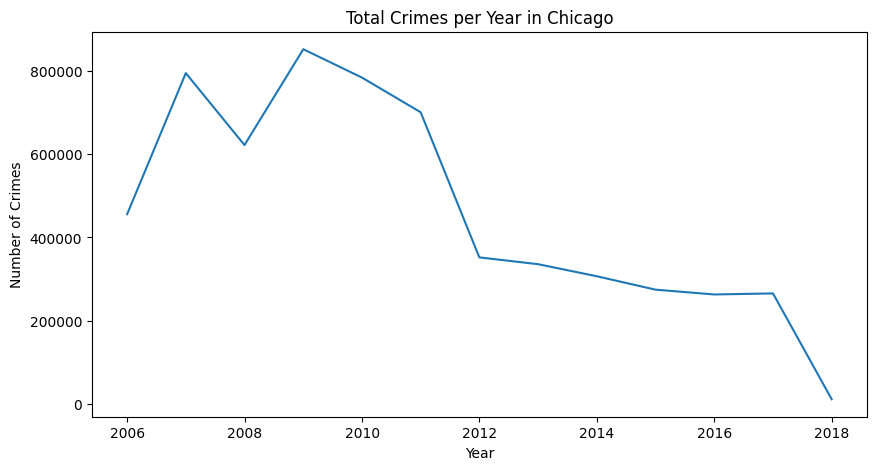

In [9]:
yearly_crime = df.resample('YE', on='Date').size()

plt.figure(figsize=(10,5))
plt.plot(yearly_crime)
plt.title("Total Crimes per Year in Chicago")
plt.xlabel("Year")
plt.ylabel("Number of Crimes")
plt.show()


## Key Observations

- Crime trends vary significantly over years
- Large-scale real-world data cleaning was required
- The cleaned dataset is now ready for forecasting models


In [10]:
# Feature Engineering: extracting time-based features
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

df[['Date', 'Year', 'Month', 'Day']].head()


,Date,Year,Month,Day
0,2006-04-02 13:00:00,2006,4,2
1,2006-02-26 13:40:48,2006,2,26
2,2006-01-08 23:16:00,2006,1,8
3,2006-04-05 18:45:00,2006,4,5
4,2006-02-17 21:03:14,2006,2,17


## Feature Engineering

Time-based features such as Year, Month, and Day are extracted
from the Date column.

These features help:
- Identify seasonal crime patterns
- Analyze long-term trends
- Improve forecasting model performance


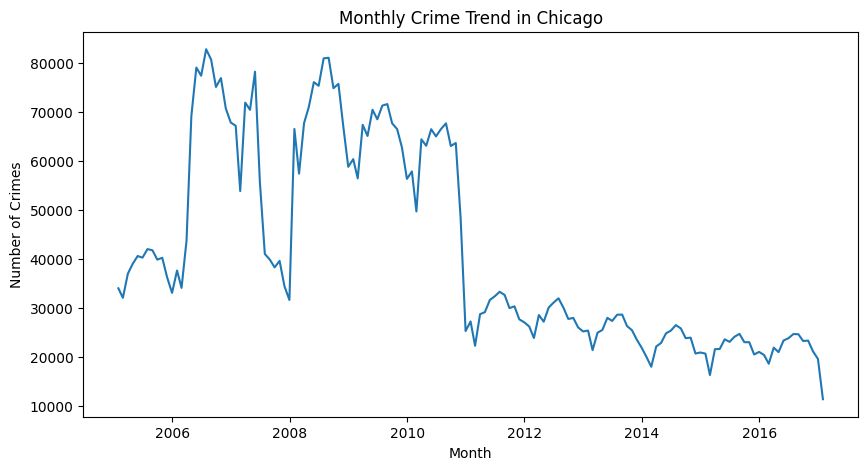

In [11]:
# Monthly crime trend
monthly_crime = df.resample('ME', on='Date').size()

plt.figure(figsize=(10,5))
plt.plot(monthly_crime)
plt.title("Monthly Crime Trend in Chicago")
plt.xlabel("Month")
plt.ylabel("Number of Crimes")
plt.show()


Seasonal Crime Patterns
Monthly aggregation reveals seasonal variations in crime. Certain months consistently show higher crime rates, indicating possible weather, social, or economic influences.

In [12]:
# Prepare monthly data for Prophet
forecast_df_monthly = monthly_crime.reset_index()
forecast_df_monthly.columns = ['ds', 'y']

forecast_df_monthly.head()


,ds,y
0,2005-01-31,33983
1,2005-02-28,32042
2,2005-03-31,36970
3,2005-04-30,38963
4,2005-05-31,40572


## Monthly Data Preparation for Forecasting

Monthly aggregation provides more data points and captures
seasonality more effectively compared to yearly aggregation.
This improves Prophet's forecasting accuracy and stability.


In [13]:
from prophet import Prophet

monthly_model = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=False,
    daily_seasonality=False,
    n_changepoints=15
)

monthly_model.fit(forecast_df_monthly)


In [15]:
future_months = monthly_model.make_future_dataframe(periods=24, freq='ME')
monthly_forecast = monthly_model.predict(future_months)

monthly_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
164,2018-09-30,8519.615215,-8998.176097,24575.001520
165,2018-10-31,8727.728326,-7807.233696,25157.633574
166,2018-11-30,3930.696145,-12996.570696,20798.148603
167,2018-12-31,-390.167996,-17083.506379,17006.459023
168,2019-01-31,462.169429,-17961.321252,16581.661722


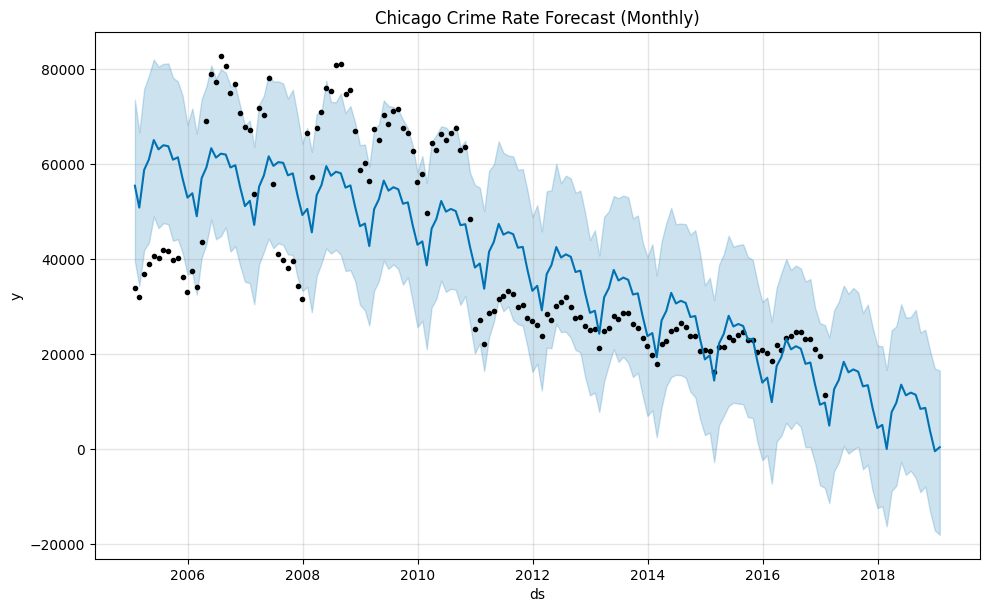

In [16]:
monthly_model.plot(monthly_forecast)
plt.title("Chicago Crime Rate Forecast (Monthly)")
plt.show()


## Monthly Crime Forecast Interpretation

Monthly forecasting captures finer seasonal patterns
and produces more stable predictions than yearly aggregation.
The forecast suggests a gradual decline with periodic fluctuations.


In [18]:
# Prepare data for forecasting
forecast_df = yearly_crime.reset_index()
forecast_df.columns = ['ds', 'y']

forecast_df.head()


,ds,y
0,2005-12-31,455811
1,2006-12-31,794684
2,2007-12-31,621848
3,2008-12-31,852053
4,2009-12-31,783900


## Forecasting Approach

Facebook Prophet is used for time-series forecasting because:
- It handles missing values well
- Automatically detects trends and seasonality
- Scales efficiently for large datasets


In [19]:
from prophet import Prophet

# Prophet model configured for yearly data
model = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=False,
    daily_seasonality=False,
    n_changepoints=8
)

model.fit(forecast_df)


In [20]:
# Forecast next 5 years
future = model.make_future_dataframe(periods=5, freq='YE')
forecast = model.predict(future)

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
13,2018-12-31,70722.058077,-123562.569535,252039.542506
14,2019-12-31,-3846.139603,-190833.415609,176831.493810
15,2020-12-31,3386.143691,-208451.453117,201998.387476
16,2021-12-31,-72076.575875,-266186.806763,116233.413681
17,2022-12-31,-147104.248609,-342644.058224,63110.092874


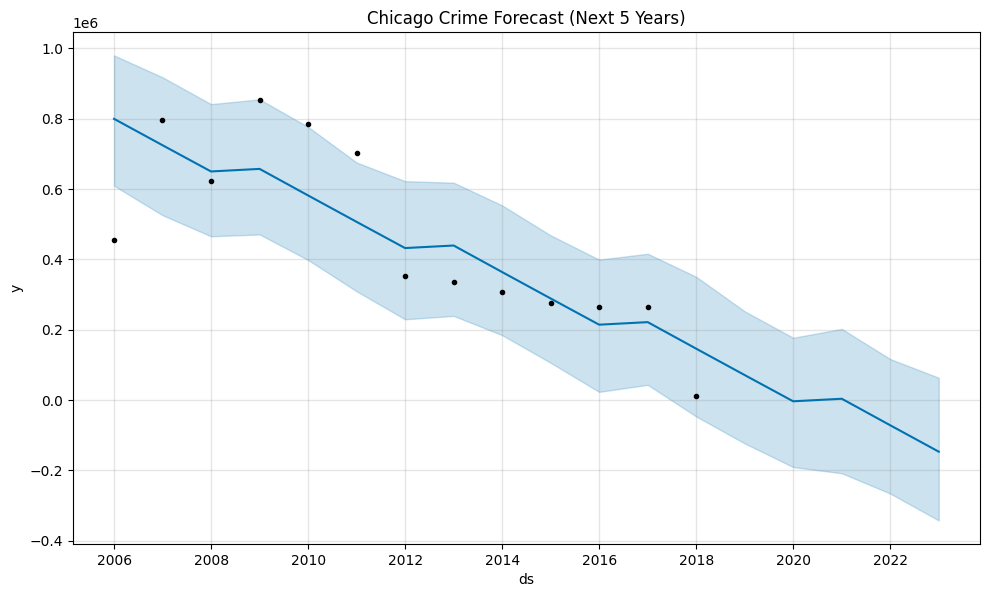

In [21]:
model.plot(forecast)
plt.title("Chicago Crime Forecast (Next 5 Years)")
plt.show()


## Final Insights

- Chicago crime rates show long-term fluctuations with clear seasonality
- Data preprocessing and cleaning were critical due to dataset size and quality
- Forecasting indicates potential future trends that can aid policy planning
- This project demonstrates real-world time-series analysis at scale
- Both yearly and monthly aggregations were explored; monthly forecasting
  provided more reliable results due to a higher number of observations


## Model Limitations

- The model forecasts total crime counts and does not predict individual crime types
- External factors such as policy changes, economic conditions, and pandemics
  are not explicitly included
- Forecast accuracy may decrease as predictions extend further into the future


## Practical Applications

- Law enforcement agencies can use forecasts for resource planning
- City planners can identify long-term crime trends for policy decisions
- Analysts can extend this approach to crime-type or location-level forecasting


In [23]:
from prophet.serialize import model_to_json, model_from_json
import json

# Save trained model
with open("prophet_crime_model.json", "w") as f:
    json.dump(model_to_json(model), f)


## Model Persistence

The trained forecasting model is saved using JSON serialization.
This avoids retraining and allows future forecasts
to be generated efficiently using the same model.


## Project Conclusion

This project demonstrates an end-to-end time-series forecasting pipeline:
from large-scale data ingestion and cleaning to visualization,
modeling, and interpretation.

The approach highlights practical challenges of real-world datasets
and showcases how forecasting models like Facebook Prophet
can support data-driven decision-making.
